# Python for Financial Analysis and Algorithmic Trading

# 05 - Data Sources

## Pandas Datareader

** NOTE: Not every geographical location works well with pandas datareader, your firewall may also block it!**

https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame. Currently the following sources are supported:


* AlphaVantage
* Federal Reserve Economic Data (FRED)
* Fama-French Data (Ken French’s Data Library)
* Bank of Canada
* Econdb
* Enigma
* Eurostat
* The Investors Exchange (IEX)
* Moscow Exchange (MOEX)
* NASDAQ
* Naver Finance
* Organisation for Economic Co-operation and Development (OECD)
* Quandl
* Stooq.com
* Tiingo
* Thrift Savings Plan (TSP)
* World Bank

It should be noted, that various sources support different kinds of data, so not all sources implement the same methods and the data elements returned might also differ.

In [1]:
# pip install pandas-datareader
import pandas_datareader.data as web # module for reading datasets directly from the web

In [2]:
import datetime

In [3]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,1,1) 

In [4]:
#facebook = web.DataReader("FB", 'google', start, end)
facebook = web.DataReader("FB", 'yahoo', start, end)

In [5]:
facebook.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006


In [6]:
# Options Table 
# from pandas_datareader.data import Options
# fb_options = Options('FB', 'yahoo')
# options_df = fb.options.get_options_data(expiry = fb_options.expiry_dates[0])
# options_df.head()
# Do not work - as google and yahoo api's do not work.
# TAKE A LOOT AT LATER on OPTIONS

## Fama-French Data (Ken French’s Data Library)

In [2]:
import pandas_datareader.data as web  # module for reading datasets directly from the web
from pandas_datareader.famafrench import get_available_datasets
# import pickleshare

In [3]:
datasets = get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))
datasets[0:10] # datasets  # comment out if you want to see all the datasets

No. of datasets:297


['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div']

__US Industry dataset__  
We are looking for a dataset of US 10 industries, thus use the keywords '10' and 'industry' to find out what the names of the relevant datasets.

In [5]:
df_10_industry = [dataset for dataset in datasets if '10' in dataset and 'Industry' in dataset]
print(df_10_industry)

['10_Industry_Portfolios', '10_Industry_Portfolios_Wout_Div', '10_Industry_Portfolios_daily']


In [7]:
# Taking [0] as extracting '10_Industry_Portfolios'

ds_industry = web.DataReader(df_10_industry[0],'famafrench',start='1963-07-01',end='2004-11-01') 

# Obtaining data from the datareader returns a dict. Thus we want to see what is inside the dict.
print(type(ds_industry))
ds_industry.keys()


<class 'dict'>


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 'DESCR'])

In [8]:
# We find that there are keys from 0-7, and also a DESCR. 
# We read the contents of DESCR and find that it explains what dataset each key from 0-7 corresponds to.

print(ds_industry['DESCR'])

10 Industry Portfolios
----------------------

This file was created by CMPT_IND_RETS using the 202012 CRSP database. It contains value- and equal-weighted returns for 10 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2020 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (497 rows x 10 cols)
  1 : Average Equal Weighted Returns -- Monthly (497 rows x 10 cols)
  2 : Average Value Weighted Returns -- Annual (42 rows x 10 cols)
  3 : Average Equal Weighted Returns -- Annual (42 rows x 10 cols)
  4 : Number of Firms in Portfolios (497 rows x 10 cols)
  5 : Average Firm Size (497 rows x 10 cols)
  6 : Sum of BE / Sum of ME (42 rows x 10 cols)
  7 : Value-Weighted Average of BE/ME (42 rows x 10 cols)


In [9]:
# DeMiguel et al. (2009), use average value-weighted returns, thus we will use dataset 0.
ds_industry[0].head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1963-07,-0.49,-0.22,-1.41,2.29,-0.69,-0.23,-1.03,0.56,0.80,-1.61
1963-08,4.89,6.55,6.20,3.93,5.14,4.29,6.43,9.56,4.20,5.49
1963-09,-1.69,-0.24,-0.76,-3.64,0.13,2.36,0.97,-4.06,-2.50,-3.16
1963-10,2.65,9.72,2.58,-0.32,8.29,3.40,0.52,3.38,-0.67,1.38
1963-11,-1.13,-4.84,0.30,-1.15,-0.29,4.16,-1.23,-1.65,-1.02,0.23


for more details visit: 
https://randlow.github.io/posts/finance-economics/pandas-datareader-KF/

## Quandl

Visit Quandl documentation https://docs.quandl.com/docs/python-time-series 
to 
- Make a time-series call
- Change formats
- Make a filtered time-series call
- Preprocess the data
- Download an entire time-series dataset

In [9]:
# pip install quandl
import quandl

In [10]:
mydata = quandl.get("EIA/PET_RWTC_D")  # WTI Crude Oil Price

In [11]:
mydata.head(3)

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53


In [12]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,8867.0,44.058637,28.803479,-36.98,19.8,32.01,62.46,145.31


<AxesSubplot:xlabel='Date'>

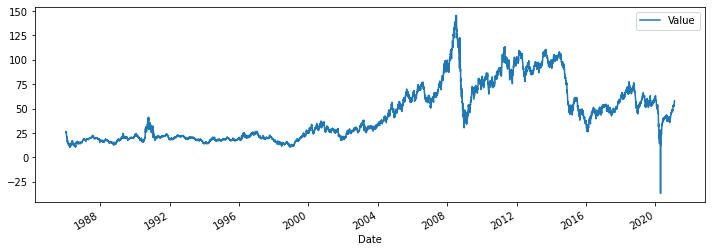

In [13]:
mydata.plot(figsize=(12,4))

In [14]:
real_estate = quandl.get('ZILLOW/C9_ZRIFAH')

In [15]:
real_estate.head()

,Value
Date,
2010-11-30,1.500
2010-12-31,1.496
2011-01-31,1.490
2011-02-28,1.484
2011-03-31,1.478


<AxesSubplot:xlabel='Date'>

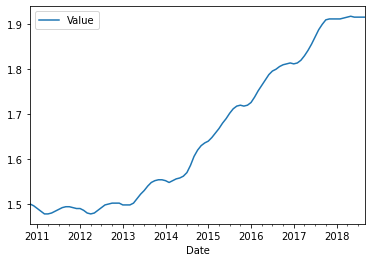

In [16]:
real_estate.plot()

In [17]:
# AAPL stock pick

In [18]:
aapl_data = quandl.get("WIKI/AAPL")

In [19]:
aapl_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [20]:
aapl_data = quandl.get("WIKI/AAPL.1") # notice indexing starts from 1

In [21]:
aapl_data.head()

,Open
Date,
1980-12-12,28.75
1980-12-15,27.38
1980-12-16,25.37
1980-12-17,25.87
1980-12-18,26.63


<AxesSubplot:xlabel='Date'>

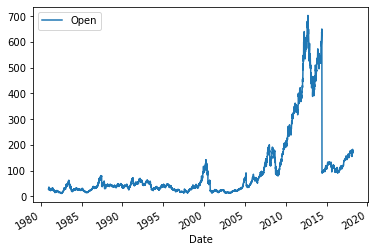

In [22]:
aapl_data.plot()

### Experimental Options

The Options class allows the download of options data from Google Finance.

The get_options_data method downloads options data for specified expiry date and provides a formatted DataFrame with a hierarchical index, so its easy to get to the specific option you want.

Available expiry dates can be accessed from the expiry_dates property.

In [23]:
from pandas_datareader.data import Options
# fb_options = Options('FB', 'google') # NotImplementedError: currently only yahoo supported
# fb_options = Options('FB', 'yahoo')  # ImmediateDeprecationError: Yahoo Options has been immediately deprecated

In [24]:
# data = fb_options.get_options_data(expiry=fb_options.expiry_dates[0]) # see above errors

In [25]:
# data.head()

## FRED

In [26]:
import pandas_datareader.data as pdr
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

gdp = pdr.DataReader("GDP", "fred", start, end)

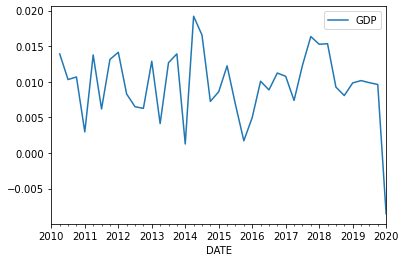

In [27]:
#gdp.head()
gdp.pct_change().plot();
# gdp.plot()

# ***END OF CHAPTER***